Dinamik Eşikleme(Otsu Algoritması): Görüntüdeki piksellerin kümelenmesini piksel değerlerinin dağılımına göre sağlamaktadır.

1'den başlayıp L'ye kadar, gri seviyedeki 0-255 piksel değerlerini, 
N görüntüdeki toplam piksel sayısını, 
n her bir gri seviyedeki pikselin piksel sayısını ifade etmek için;
**N = n1 + n2 +n3 + ... + nl**

Her bir pikselin yüzdesel bazda ağırlığını hesaplamak için; 
**Pi = ni / N**




In [ ]:
from PIL import Image
import os, sys
import numpy as np
from pylab import *

In [ ]:
img = Image.open('/content/Ak (50).png').convert('L')
bosluk = ones((img.size[1],20))*255
n = img.size[0] * img.size[1]
figure(1)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

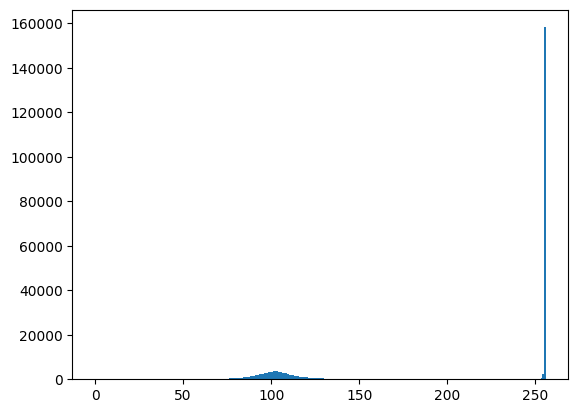

In [ ]:
n_i =hist(array(img).ravel(),bins=range(0,257))[0]

In [ ]:
p_i = n_i / n
maksimum,otsu_th=0,0

In [ ]:
for i in range(len(n_i)):
  w1 = sum(p_i[:i])
  w2 = sum(p_i[i:])
  mu1= sum(array([j for j in range(i)])*p_i[:i])/w1
  mu2= sum(array([j for j in range(i,256)])*p_i[i:])/w2
  val= w1*w2*np.power((mu1-mu2),2)
  if maksimum < val:
    maksimum = val
    otsu_th = i
print("Otsu Eşikleme Değeri: ",otsu_th)

Otsu Eşikleme Değeri:  179


<ipython-input-6-adc6f9b0a1de>:4: RuntimeWarning: invalid value encountered in double_scalars
  mu1= sum(array([j for j in range(i)])*p_i[:i])/w1


In [ ]:
def esikleme(goruntu,th):
  goruntu=array(goruntu)
  B_E_goruntu = zeros((len(goruntu),len(goruntu[0])))
  for i in range(len(goruntu)):
    for j in range(len(goruntu[0])):
      if goruntu[i][j]>th:
        B_E_goruntu[i][j]=255
      else:
        B_E_goruntu[i][j]=0
  return B_E_goruntu
otsu_goruntu=esikleme(img,otsu_th)

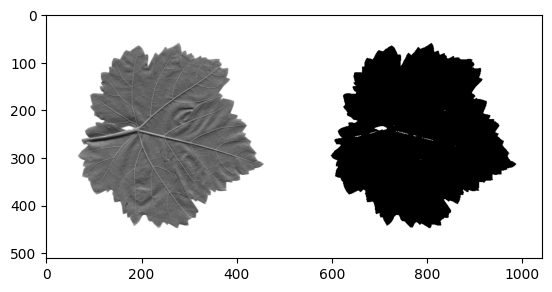

In [ ]:
x = concatenate((array(img),bosluk,otsu_goruntu),axis=1)
images = Image.fromarray(x.astype('uint8'))
figure(2)
imshow(images,cmap="gray")